# Code

### Importing libraries and dataset

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from cvxopt import matrix, solvers

In [195]:
data = pd.read_csv("/Users/ambuj/Desktop/iris.data", names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'])
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Question-1

### Model Creation

#### Write your SVM function for implementing binary SVM algorithm with linear and RBF kernel.

In [196]:
def kernel(name, x, y):
    if name == 'linear':
        return np.dot(x, y.T)
    if name == 'poly':
        return (1 + np.dot(x, y.T)) ** 3
    if name == 'RBF':
        gamma = 0.5
        return math.exp(-gamma * np.linalg.norm(x-y) ** 2)

In [197]:
class SVM:
    def __init__(self):
        pass

    def fit(self, X, y, kernel_name='linear'):
        # Store for later use
        self.X = X
        self.y = y
        self.m = X.shape[0]
        self.kernel_name = kernel_name

        # Create optimization problem matrices
        P = np.empty((self.m, self.m))
        for i in range(self.m):
            for j in range(self.m):
                P[i, j] = y[i] * y[j] * kernel(kernel_name, X[i], X[j])
        q = -np.ones((self.m, 1))
        G = -np.eye(self.m)
        h = np.zeros((self.m, 1))
        A = y.reshape((1, self.m))
        b = np.zeros((1, 1))

        # Convert to CVXOPT matrix format
        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)
        A = matrix(A.astype('double'))
        b = matrix(b)

        # Solve Optimization Problem
        sol = solvers.qp(P, q, G, h, A, b)
        self.lambdas = np.array(sol['x']).reshape(self.m)

        # Calculate b
        SV = np.where(self.lambdas > 1e-4)[0][0]
        self.b = y[SV] - sum(self.lambdas * y * kernel(kernel_name, X, X[SV]))

    # Plot scatterplot of data and contour plot of SVM
    def plot(self):
        x_min = min(self.X[:, 0]) - 0.5
        x_max = max(self.X[:, 0]) + 0.5
        y_min = min(self.X[:, 1]) - 0.5
        y_max = max(self.X[:, 1]) + 0.5
        step = 0.02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
        d = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)

        Z = self.b + np.sum(
            self.lambdas.reshape((self.m, 1)) * self.y.reshape((self.m, 1)) * kernel(self.kernel_name, self.X, d),
            axis=0)
        Z = Z.reshape(xx.shape)

        fig, ax = plt.subplots(figsize = (8,8))
        sns.scatterplot(x=self.X[:, 0], y=self.X[:, 1], hue=self.y, ax=ax, palette='winter')
        ax.contour(xx, yy, Z, levels=[-1, 0, 1])
        fig.show()

    # Predict class of given data point
    def predict(self, u):
        if self.b + sum(self.lambdas * self.y * kernel(self.kernel_name, self.X, u)) >= 0:
            return 1
        else:
            return -1

In [198]:
def accuracy(y, est_y):
    count = 0
    for i in range(len(y)):
        if y[i]==est_y[i]:
            count = count+1
    accuracy = count/len(y)
    return accuracy*100

# Question-2

### Calculating accuracy and plotting SVM linear hyperplane

#### Consider the Sepal. Length and Sepal Width of the Setosa and Versicolor flowers only. It would be 100 ×3 dataset. Train an SVM classifier with a linear kernel. Find the separating hyperplane. Plot the separating hyperplane along with the data points. (Use different colors for different classes).

In [199]:
selected_df = data.loc[0:99]
selected_df = selected_df[['Sepal Length','Sepal Width', 'Species']]
X, y = selected_df[['Sepal Length','Sepal Width']].to_numpy(), selected_df['Species'].to_numpy()
y[0:50] = -1
y[50:100] = 1

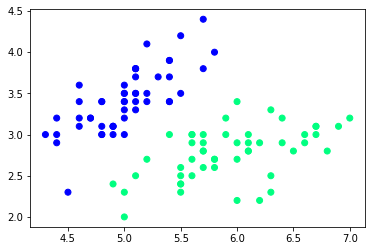

In [200]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

     pcost       dcost       gap    pres   dres
 0: -1.7775e+01 -3.8527e+01  3e+02  2e+01  2e+00
 1: -3.0310e+01 -3.6184e+01  1e+02  7e+00  8e-01
 2: -5.7279e+01 -5.4062e+01  1e+02  4e+00  5e-01
 3: -4.3187e+01 -4.2685e+01  5e+01  1e+00  2e-01
 4: -3.3936e+01 -3.4346e+01  4e+00  1e-01  1e-02
 5: -3.3794e+01 -3.3801e+01  4e-02  1e-03  1e-04
 6: -3.3795e+01 -3.3795e+01  4e-04  1e-05  1e-06
 7: -3.3795e+01 -3.3795e+01  4e-06  1e-07  1e-08
 8: -3.3795e+01 -3.3795e+01  4e-08  1e-09  1e-10
Optimal solution found.


/var/folders/kl/55tfkryd5vs0fjm2fnv6vd140000gn/T/ipykernel_71532/3222782499.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


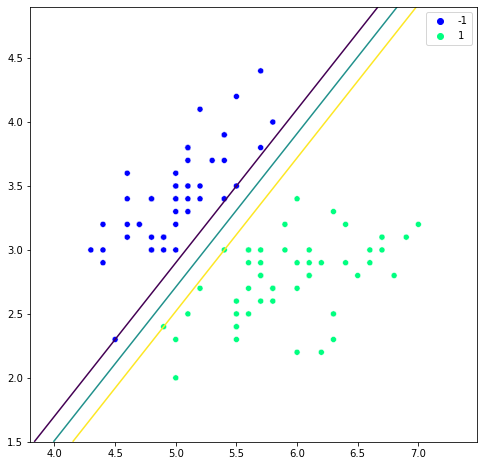

In [201]:
svm = SVM()
svm.fit(X, y)
svm.plot()

In [245]:
est_y = []
for data_point in X:
    est_y.append(svm.predict(data_point))
    
print("Predicted values are : " + str(est_y))
print("Accuracy observed for data is : " + str(accuracy(y, est_y)))

Predicted values are : [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy observed for data is : 100.0


# Question-3

#### Consider the Setosa and Versicolor flowers (100× 5 dataset) . Separate the first 80 data points as the training set, the next 10 data points as the validation set and the last 10 data points as the testing set. Find the testing accuracy of your SVM model with a linear kernel.

In [202]:
train_X, val_X, test_X = X[0:80], X[80:90], X[90:100]
train_y, val_y, test_y = y[0:80], y[80:90], y[90:100]

In [203]:
svm = SVM()
svm.fit(train_X, train_y)
est_val_y = []
for val_point in val_X:
    est_val_y.append(svm.predict(val_point))
    
print("Predicted validation values are : " + str(est_val_y))
print("Accuracy observed for validation data is : " + str(accuracy(val_y, est_val_y)))

     pcost       dcost       gap    pres   dres
 0: -1.1929e+01 -2.6143e+01  2e+02  1e+01  2e+00
 1: -2.0068e+01 -2.6219e+01  9e+01  5e+00  7e-01
 2: -4.4907e+01 -4.4434e+01  9e+01  4e+00  6e-01
 3: -5.0549e+01 -4.4739e+01  6e+01  2e+00  4e-01
 4: -3.6199e+01 -3.6070e+01  2e+01  5e-01  7e-02
 5: -3.1665e+01 -3.4049e+01  2e+00  1e-03  2e-04
 6: -3.3771e+01 -3.3798e+01  3e-02  1e-05  2e-06
 7: -3.3795e+01 -3.3795e+01  3e-04  1e-07  2e-08
 8: -3.3795e+01 -3.3795e+01  3e-06  1e-09  2e-10
Optimal solution found.
Predicted validation values are : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy observed for validation data is : 100.0


In [204]:
est_test_y = []
for test_point in test_X:
    est_test_y.append(svm.predict(test_point))
    
print("Predicted test values are : " + str(est_test_y))
print("Accuracy observed for testing is : " + str(accuracy(test_y, est_test_y)))

Predicted test values are : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy observed for testing is : 100.0


# Question-4

#### SVM model with RBF kernel

#### Consider the Setosa and Virginica flowers (100× 5 datasets) . Separate the first 80 data points as the training set, the next 10 data points as the validation set and the last 10 data points as the testing set. Find the testing accuracy of your SVM model with the RBF kernel.

In [225]:
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [226]:
selected_df = data[data['Species'].isin(['Iris-setosa', 'Iris-virginica'])]
selected_df = selected_df.replace(['Iris-setosa', 'Iris-virginica'],[-1,1])

In [227]:
y = selected_df['Species'].to_numpy()
X = selected_df.drop(['Species'], axis=1).to_numpy()

In [228]:
train_X = np.concatenate((X[0:40],X[50:90]), axis =0)
train_y = np.concatenate((y[0:40],y[50:90]), axis =0)

val_X = np.concatenate((X[40:45],X[90:95]), axis =0)
val_y = np.concatenate((y[40:45],y[90:95]), axis =0)

test_X = np.concatenate((X[45:50],X[95:100]), axis =0)
test_y = np.concatenate((y[45:50],y[95:100]), axis =0)

In [229]:
svm = SVM()
svm.fit(train_X, train_y, kernel_name='RBF')
est_val_y = []
for val_point in val_X:
    est_val_y.append(svm.predict(val_point))
    
print("Predicted validation values are : " + str(est_val_y))
print("Accuracy observed for validation data is : " + str(accuracy(val_y, est_val_y)))

     pcost       dcost       gap    pres   dres
 0: -2.1366e+00 -6.2935e+00  1e+02  9e+00  1e+00
 1: -4.1278e-01 -6.8598e+00  6e+00  1e-15  5e-16
 2: -1.9496e+00 -2.8930e+00  9e-01  2e-16  5e-16
 3: -2.1880e+00 -2.4183e+00  2e-01  4e-16  4e-16
 4: -2.2592e+00 -2.3504e+00  9e-02  4e-16  3e-16
 5: -2.2996e+00 -2.3270e+00  3e-02  3e-16  3e-16
 6: -2.3139e+00 -2.3201e+00  6e-03  2e-16  3e-16
 7: -2.3183e+00 -2.3185e+00  2e-04  4e-16  3e-16
 8: -2.3184e+00 -2.3184e+00  2e-06  2e-16  4e-16
Optimal solution found.
Predicted validation values are : [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Accuracy observed for validation data is : 50.0


In [230]:
est_test_y = []
for test_point in test_X:
    est_test_y.append(svm.predict(test_point))
    
print("Predicted test values are : " + str(est_test_y))
print("Accuracy observed for testing is : " + str(accuracy(test_y, est_test_y)))

Predicted test values are : [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Accuracy observed for testing is : 50.0


# Question-5

#### Attempts to extend your SVM model for three-class classification with RBF kernel on the whole IRIS dataset with 80% of data points as the training set 10%of data points as the validation set and 10 % of data points as testing set.

In [265]:
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [266]:
selected_df = data[data['Species'].isin(['Iris-setosa', 'Iris-versicolor','Iris-virginica' ])]
selected_df = selected_df.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[1,2,3])

y = selected_df['Species'].to_numpy()
X = selected_df.drop(['Species'], axis=1).to_numpy()

In [267]:
from sklearn.model_selection import train_test_split

train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=1 - train_ratio)
val_X, test_X, val_y, test_y = train_test_split(test_X, test_y, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [268]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf =  SVC(kernel='rbf')
clf.fit(train_X, train_y)

est_val_y = clf.predict(val_X)
est_test_y = clf.predict(test_X)

validation_accuracy = accuracy_score(val_y, est_val_y)
test_accuracy = accuracy_score(test_y, est_test_y)

print("Validation accuracy : " , validation_accuracy )
print("Testing accuracy : " , test_accuracy )

Validation accuracy :  1.0
Testing accuracy :  1.0


# Question-6

### Applying PCA and then calculating testing accuracy

#### Consider the Setosa and Versicolor flowers (100× 5 dataset). Apply the PCA and reduce the each flower with two features only with minimal loss of information. Separate the first 80 data points as training set, next 10 data points as validation set and last 10 data points as testing set. Find the testing accuracy of your SVM model with linear kernel on reduced set. Compare its accuracy with the accuracy computed at question (2).

In [232]:
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [233]:
selected_df = data[data['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]
selected_df = selected_df.replace(['Iris-setosa', 'Iris-versicolor'],[-1,1])

y = selected_df['Species'].to_numpy()
X = selected_df.drop(['Species'], axis=1).to_numpy()

In [236]:
from sklearn.decomposition import PCA

In [239]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [240]:
train_X = np.concatenate((X[0:40],X[50:90]), axis =0)
train_y = np.concatenate((y[0:40],y[50:90]), axis =0)

val_X = np.concatenate((X[40:45],X[90:95]), axis =0)
val_y = np.concatenate((y[40:45],y[90:95]), axis =0)

test_X = np.concatenate((X[45:50],X[95:100]), axis =0)
test_y = np.concatenate((y[45:50],y[95:100]), axis =0)

In [243]:
svm = SVM()
svm.fit(train_X, train_y)
est_val_y = []
for val_point in val_X:
    est_val_y.append(svm.predict(val_point))
    
print("Predicted validation values are : " + str(est_val_y))
print("Accuracy observed for validation data is : " + str(accuracy(val_y, est_val_y)))

     pcost       dcost       gap    pres   dres
 0: -3.1056e+00 -5.2137e+00  2e+02  1e+01  2e+00
 1: -7.5148e-01 -1.6085e+00  1e+01  8e-01  1e-01
 2: -1.5686e-01 -1.0793e+00  1e+00  3e-03  4e-04
 3: -3.8944e-01 -5.8561e-01  2e-01  6e-04  6e-05
 4: -4.1669e-01 -5.9829e-01  2e-01  5e-04  5e-05
 5: -5.3744e-01 -5.8553e-01  5e-02  7e-05  8e-06
 6: -5.6657e-01 -5.6798e-01  1e-03  2e-06  2e-07
 7: -5.6772e-01 -5.6773e-01  1e-05  2e-08  2e-09
 8: -5.6773e-01 -5.6773e-01  1e-07  2e-10  2e-11
Optimal solution found.
Predicted validation values are : [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]
Accuracy observed for validation data is : 100.0


In [244]:
est_test_y = []
for test_point in test_X:
    est_test_y.append(svm.predict(test_point))
    
print("Predicted test values are : " + str(est_test_y))
print("Accuracy observed for testing is : " + str(accuracy(test_y, est_test_y)))

Predicted test values are : [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]
Accuracy observed for testing is : 100.0


## Comparison-

In 2nd question, We were asked to calculate testing accuracy by taking only first 2 features. But here, we were asked to calculate 2 principle components out of the 4 given components on the basis of PCA. Accuracy in both the cases are same.
Although we can conclude that dataset given is very small. But, if the dataset was significantly large, we can say that accuracy in case of Question-6 would be large because 2 features of PCA made from 4 would contain more information than 2 normal features.

# Thank You!